In [2]:
import numpy as np
import scipy
from scipy import stats
import pandas as pd
import pymc3 as pm
#import theano.tensor as tt
from scipy import optimize
# matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
import arviz as az
import math as math

In [3]:
RANDOM_SEED = 8053
np.random.seed(RANDOM_SEED)

In [4]:
data = []
for i in range(1):
    data.append(np.random.normal(0, 1, 1)[0])

In [5]:
# We only have one data 

data

[-1.5056146473429177]

In [8]:
# Use Cauchy(0,1)

N_SAMPLES = 10000

with pm.Model() as morph_model:
    theta = pm.Cauchy('theta', alpha=0, beta = 1)
    
    observed = pm.Normal('obs', mu=theta, sigma=1, observed=data)
    start=pm.find_MAP()
    
    # Using Metropolis Hastings Sampling
    step = pm.Metropolis()
    
    # Sample from the posterior using the sampling method
    lya_trace_C_0_1 = pm.sample(N_SAMPLES, step=step, return_inferencedata=True)

C:\Users\Rzhou\AppData\Roaming\Python\Python39\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Rzhou\AppData\Roaming\Python\Python39\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Rzhou\AppData\Roaming\Python\Python39\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 39 seconds.
The number of effective samples is smaller than 25% for some parameters.


array([[<AxesSubplot:title={'center':'theta'}>,
        <AxesSubplot:title={'center':'theta'}>]], dtype=object)

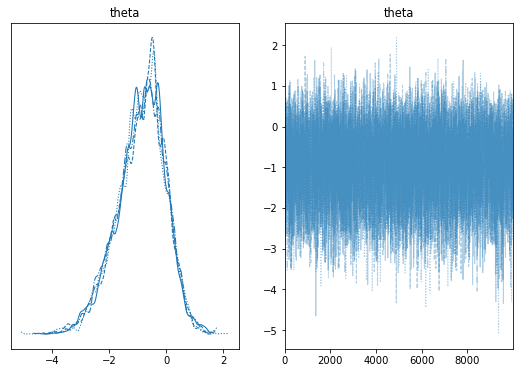

In [28]:
az.plot_trace(lya_trace_C_0_1,var_names=['theta'],figsize=(9, 6))

In [12]:
pos = az.summary(lya_trace_C_0_1,var_names=['theta'])
print(pos)

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
theta -0.885  0.843  -2.537     0.59      0.009    0.007    8870.0    9785.0   

       r_hat  
theta    1.0  


In [13]:
# Use Cauchy(10,1)

N_SAMPLES = 10000

with pm.Model() as morph_model:
    theta = pm.Cauchy('theta', alpha=10, beta = 1)
    
    observed = pm.Normal('obs', mu=theta, sigma=1, observed=data)
    start=pm.find_MAP()
    
    # Using Metropolis Hastings Sampling
    step = pm.Metropolis()
    
    # Sample from the posterior using the sampling method
    lya_trace_C_10_1 = pm.sample(N_SAMPLES, step=step, return_inferencedata=True)

C:\Users\Rzhou\AppData\Roaming\Python\Python39\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Rzhou\AppData\Roaming\Python\Python39\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Rzhou\AppData\Roaming\Python\Python39\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 39 seconds.
The number of effective samples is smaller than 25% for some parameters.


array([[<AxesSubplot:title={'center':'theta'}>,
        <AxesSubplot:title={'center':'theta'}>]], dtype=object)

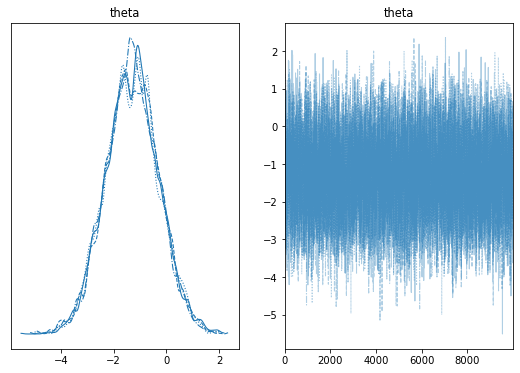

In [29]:
az.plot_trace(lya_trace_C_10_1,var_names=['theta'],figsize=(9, 6))

In [15]:
pos = az.summary(lya_trace_C_10_1,var_names=['theta'])
print(pos)

        mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
theta -1.307  1.0  -3.125    0.628       0.01    0.007    9728.0   10803.0   

       r_hat  
theta    1.0  


In [17]:
# Use Cauchy(1000,1)

N_SAMPLES = 10000

with pm.Model() as morph_model:
    theta = pm.Cauchy('theta', alpha=1000, beta = 1)
    
    observed = pm.Normal('obs', mu=theta, sigma=1, observed=data)
    start=pm.find_MAP()
    
    # Using Metropolis Hastings Sampling
    step = pm.Metropolis()
    
    # Sample from the posterior using the sampling method
    lya_trace_C_1000_1 = pm.sample(N_SAMPLES, step=step, return_inferencedata=True)

C:\Users\Rzhou\AppData\Roaming\Python\Python39\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Rzhou\AppData\Roaming\Python\Python39\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Rzhou\AppData\Roaming\Python\Python39\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 38 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.


array([[<AxesSubplot:title={'center':'theta'}>,
        <AxesSubplot:title={'center':'theta'}>]], dtype=object)

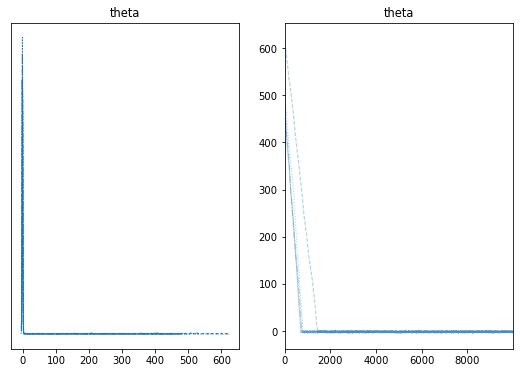

In [30]:
az.plot_trace(lya_trace_C_1000_1,var_names=['theta'],figsize=(9, 6))

In [19]:
pos = az.summary(lya_trace_C_10_1,var_names=['theta'])
print(pos)

        mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
theta -1.307  1.0  -3.125    0.628       0.01    0.007    9728.0   10803.0   

       r_hat  
theta    1.0  


In [20]:
N_SAMPLES = 10000

with pm.Model() as morph_model:
    theta = pm.Normal('theta', mu=0, sigma = 1)
    
    observed = pm.Normal('obs', mu=theta, sigma=1, observed=data)
    start=pm.find_MAP()
    
    # Using Metropolis Hastings Sampling
    step = pm.Metropolis()
    
    # Sample from the posterior using the sampling method
    lya_trace_N_0_1 = pm.sample(N_SAMPLES, step=step, return_inferencedata=True)

C:\Users\Rzhou\AppData\Roaming\Python\Python39\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Rzhou\AppData\Roaming\Python\Python39\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Rzhou\AppData\Roaming\Python\Python39\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


Multiprocess sampling (4 chains in 4 jobs)


Metropolis: [theta]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 39 seconds.
The number of effective samples is smaller than 25% for some parameters.


array([[<AxesSubplot:title={'center':'theta'}>,
        <AxesSubplot:title={'center':'theta'}>]], dtype=object)

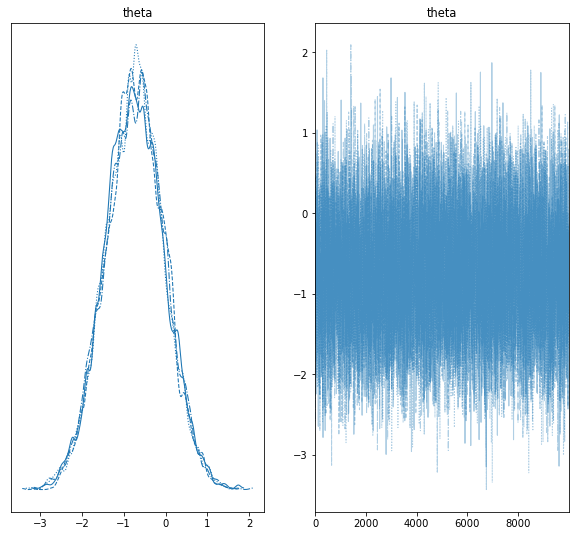

In [21]:
az.plot_trace(lya_trace_N_0_1,var_names=['theta'],figsize=(10, 9))

In [22]:
pos = az.summary(lya_trace_N_0_1,var_names=['theta'])
print(pos)

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
theta -0.742  0.702  -2.077    0.561      0.007    0.005    9346.0   10124.0   

       r_hat  
theta    1.0  


In [23]:
N_SAMPLES = 10000

with pm.Model() as morph_model:
    theta = pm.Normal('theta', mu=10, sigma = 1)
    
    observed = pm.Normal('obs', mu=theta, sigma=1, observed=data)
    start=pm.find_MAP()
    
    # Using Metropolis Hastings Sampling
    step = pm.Metropolis()
    
    # Sample from the posterior using the sampling method
    lya_trace_N_10_1 = pm.sample(N_SAMPLES, step=step, return_inferencedata=True)

C:\Users\Rzhou\AppData\Roaming\Python\Python39\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Rzhou\AppData\Roaming\Python\Python39\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Rzhou\AppData\Roaming\Python\Python39\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 41 seconds.
The number of effective samples is smaller than 25% for some parameters.


array([[<AxesSubplot:title={'center':'theta'}>,
        <AxesSubplot:title={'center':'theta'}>]], dtype=object)

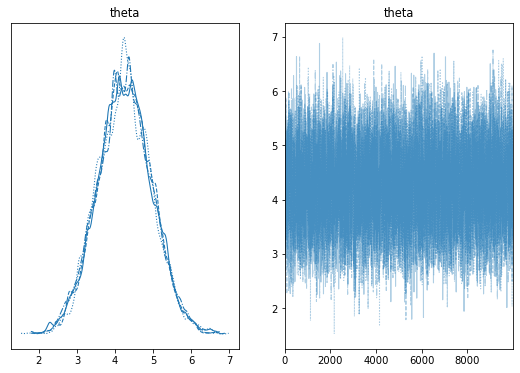

In [31]:
az.plot_trace(lya_trace_N_10_1,var_names=['theta'],figsize=(9, 6))

In [25]:
pos = az.summary(lya_trace_N_10_1,var_names=['theta'])
print(pos)

        mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
theta  4.252  0.71   2.926    5.585      0.008    0.006    8298.0    8987.0   

       r_hat  
theta    1.0  


In [26]:
(10-1.5)/2

4.25